In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_conv_model3, get_vector_conv_model3, get_scalar_conv_model4, get_vector_conv_model4
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('mnist', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('mnist', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('mnist')

dataset_shapes

([28, 28, 1], [10])

## ConvNets C-C-P

### Scalar

Average elapsed training time: 27.01237 sec
Last measures: [0.05694855377078056, 0.05020050331950188, 0.0651504322886467, 0.04339107871055603, 0.02469138242304325]


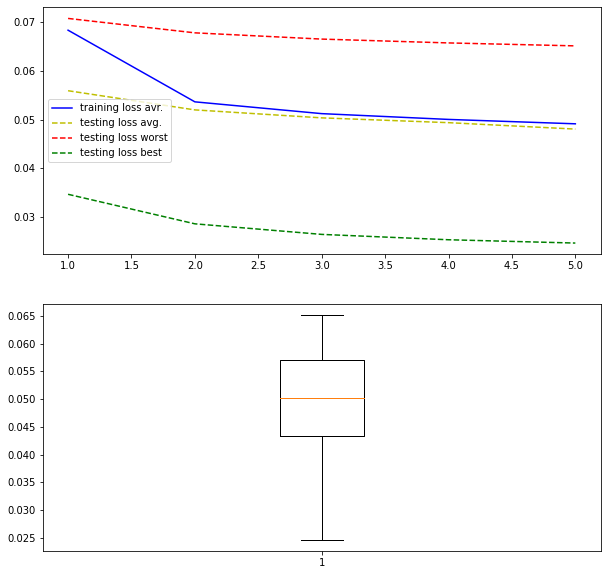

In [3]:
model_fun = lambda: get_scalar_conv_model4(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### Vector, with fractal C1

Average elapsed training time: 44.83516 sec
Last measures: [0.07783273607492447, 0.07628579437732697, 0.07737234979867935, 0.07389671355485916, 0.07840380072593689]


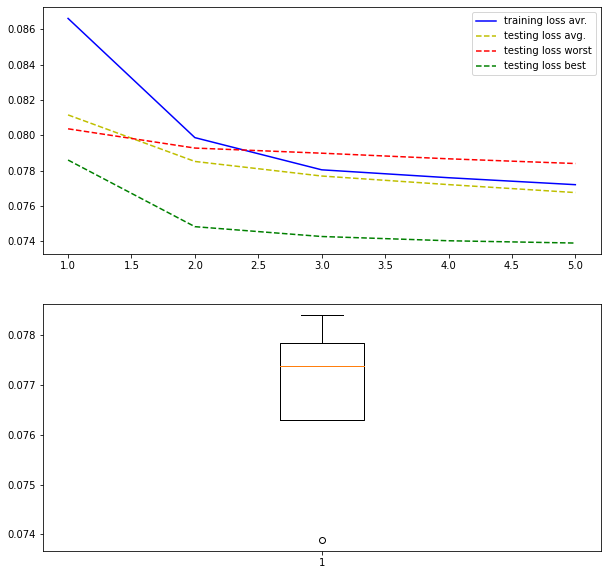

In [4]:
shared_inner_nets = False
model_fun = lambda: get_vector_conv_model4(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

Average elapsed training time: 46.45915 sec
Last measures: [0.0769653394818306, 0.07654786109924316, 0.07720869034528732, 0.07577238231897354, 0.07883007079362869]


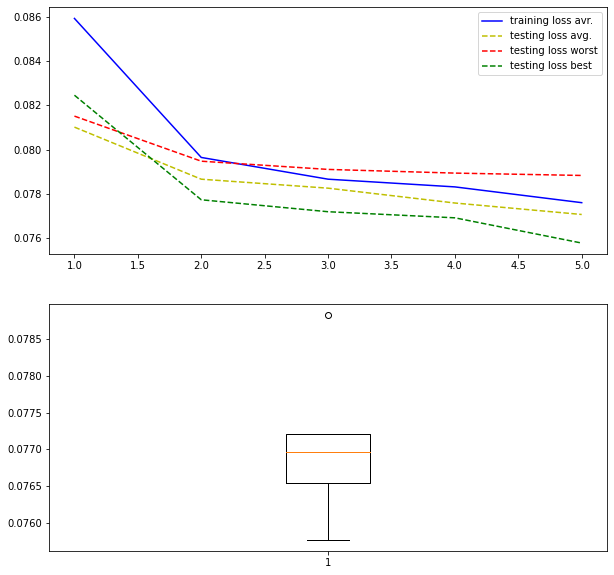

In [5]:
shared_inner_nets = True
model_fun = lambda: get_vector_conv_model4(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

## ConvNets C-P-C, with subsampled input

### Scalar

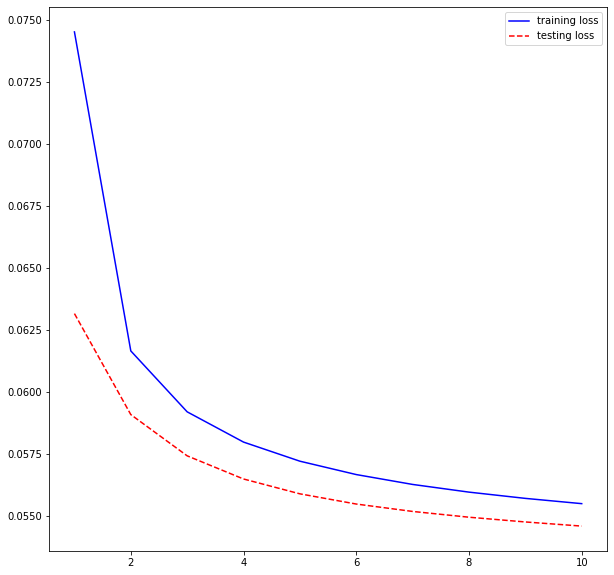

Elapsed training time: 54.14518 sec
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 5)           50        
_________________________________________________________________
re_lu (ReLU)                 (None, 5, 5, 5)           0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 5)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 10)          210       
_________________________________________________________________
activation (Activation)  

In [3]:
model = get_scalar_conv_model3(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=10, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 26.87902 sec
Last measures: [0.049909647554159164, 0.06249096244573593, 0.06415899097919464, 0.05616006627678871, 0.05636925622820854]


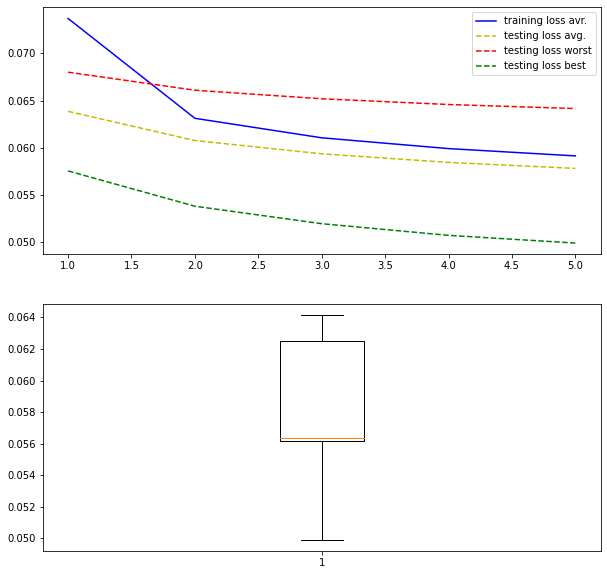

In [6]:
model_fun = lambda: get_scalar_conv_model3(dataset_shapes, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

### Vector, with fractal C1

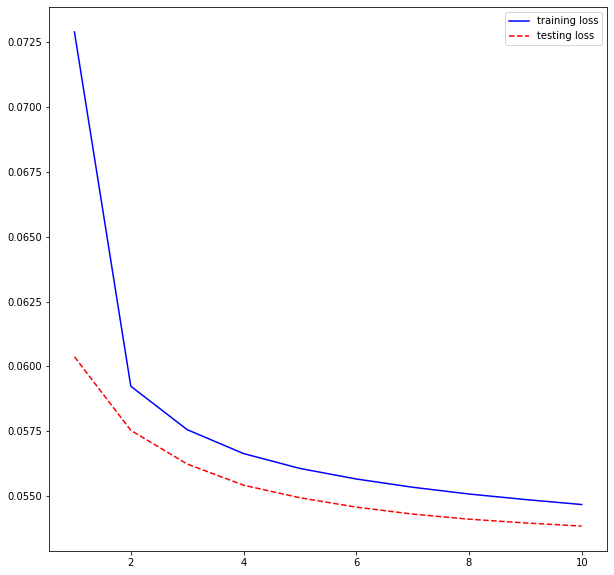

Elapsed training time: 77.80618 sec
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 1)           0         
_________________________________________________________________
v_input_conv (VInputConv)    (None, 10, 5, 5, 5)       50        
_________________________________________________________________
v_conv_fractal (VConvFractal (None, 4, 2, 2, 5)        160       
_________________________________________________________________
v_output_conv (VOutputConv)  (None, 2, 2, 5)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 10)          210       
_________________________________________________________________
activation_1 (Activatio

In [4]:
shared_inner_nets = False
model = get_vector_conv_model3(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=10, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 39.92968 sec
Last measures: [0.06165458261966705, 0.06491926312446594, 0.05655539035797119, 0.06566856801509857, 0.05386098474264145]


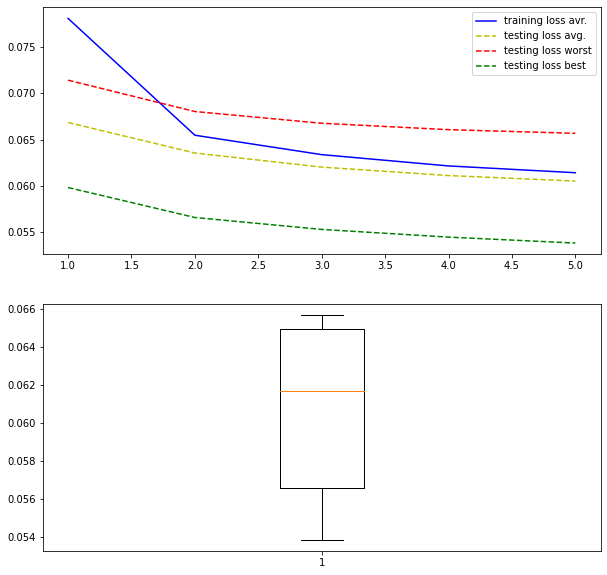

In [7]:
shared_inner_nets = False
model_fun = lambda: get_vector_conv_model3(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")

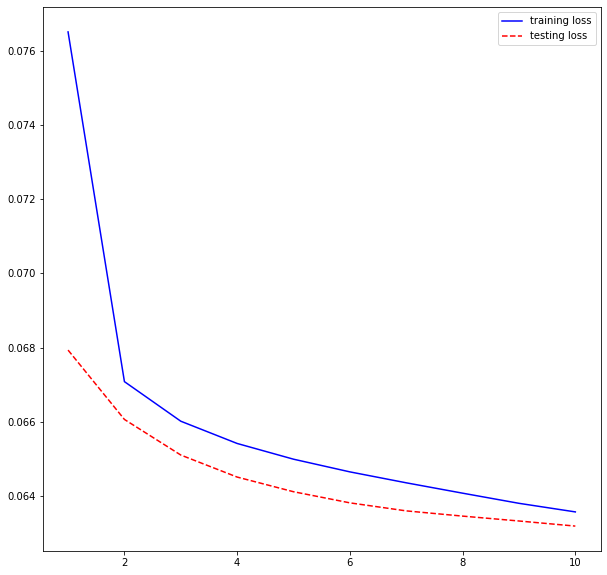

Elapsed training time: 79.03164 sec
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 7, 1)           0         
_________________________________________________________________
v_input_conv_1 (VInputConv)  (None, 10, 5, 5, 5)       50        
_________________________________________________________________
v_conv_fractal_1 (VConvFract (None, 4, 2, 2, 5)        32        
_________________________________________________________________
v_output_conv_1 (VOutputConv (None, 2, 2, 5)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          210       
_________________________________________________________________
activation_2 (Activatio

In [5]:
shared_inner_nets = True
model = get_vector_conv_model3(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model(model, train_dataset, test_dataset, epochs=10, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

Average elapsed training time: 39.84958 sec
Last measures: [0.09000027924776077, 0.0899999663233757, 0.060097306966781616, 0.06370650976896286, 0.08997970074415207]


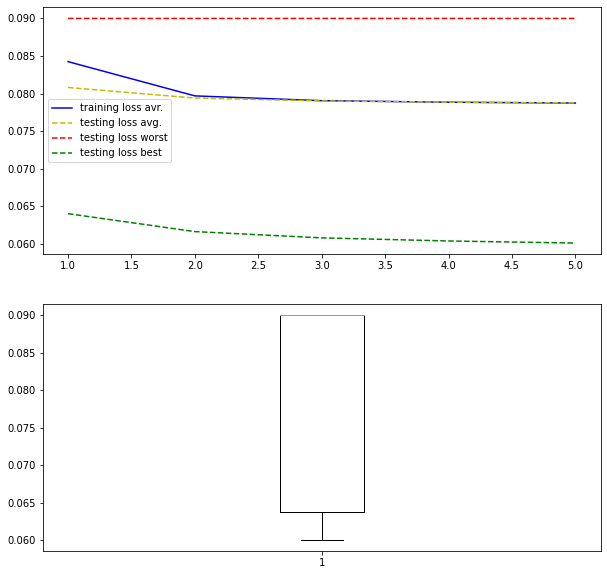

In [8]:
shared_inner_nets = True
model_fun = lambda: get_vector_conv_model3(dataset_shapes, shared_inner_nets, optimizer=keras.optimizers.Adam())

test_model_multiple(model_fun, train_dataset, test_dataset, epochs=5, num_tries=5, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error")